# Analysis of Guideline Summaries from www.guideline.gov

In [1]:
with open("../scripts/archive-status-guideline-summaries-seeds.uniq.mdt.tsv") as f:
    data = f.read()

In [2]:
identifiers = []
mementocounts = []
timemaps = []
totalcount = 0
notarchived = []
alldata = {}

for line in data.splitlines():
    line = line.strip()
    row = line.split('\t')
    
    if row[1] == 'ARCHIVED':
        s2 = row[0].replace('https://www.guideline.gov/summaries/summary/', '')
        identifier = int(s2[:s2.find('/')])
#         mementocount = int(row[2].replace("mementos", "").strip())
        timemap = eval(row[3])
        mementocount = len(timemap)
        
        identifiers.append( identifier )
        mementocounts.append( mementocount )
        
        timemaps.append( timemap )
        
        alldata[identifier] = timemap
        
    elif row[1] == 'NOT ARCHIVED':
        notarchived.append(row[0])
        
    totalcount += 1

In [3]:
len(identifiers)

1401

In [4]:
len(mementocounts)

1401

In [5]:
len(timemaps)

1401

In [6]:
totalcount

1415

In [7]:
len(notarchived)

14

In [8]:
len(notarchived) / totalcount

0.009893992932862191

In [9]:
len(timemaps) / totalcount

0.9901060070671378

In [10]:
import matplotlib.pyplot as plt

In [11]:
max(mementocounts)

24

In [12]:
min(mementocounts)

1

In [13]:
min(identifiers)

2826

In [14]:
max(identifiers)

51326

counts: [ 25.  28.  11.  22.   5.  68.  78. 138. 919.  70.  13.   5.   0.   3.
   7.   6.   1.   0.   0.   1.   0.   0.   0.   0.   1.]
bars: [ 1.    1.92  2.84  3.76  4.68  5.6   6.52  7.44  8.36  9.28 10.2  11.12
 12.04 12.96 13.88 14.8  15.72 16.64 17.56 18.48 19.4  20.32 21.24 22.16
 23.08 24.  ]
bins: <a list of 25 Patch objects>
max counts: 919.0
index of max counts: 8
bars[ind]: 8.36


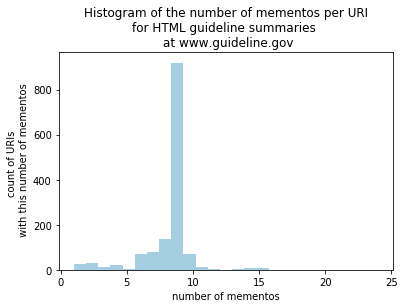

In [15]:
counts, bars, bins = plt.hist(mementocounts, bins=25, color="#a6cee3")
plt.xlabel("number of mementos")
plt.ylabel("count of URIs \n with this number of mementos")
plt.title("Histogram of the number of mementos per URI\nfor HTML guideline summaries \n at www.guideline.gov")
print("counts: {}".format(counts))
print("bars: {}".format(bars))
print("bins: {}".format(bins))
print("max counts: {}".format(max(counts)))
ind = counts.tolist().index(max(counts))
print("index of max counts: {}".format(ind))
print("bars[ind]: {}".format(bars[ind]))

Text(0,0.5,'document identifier')

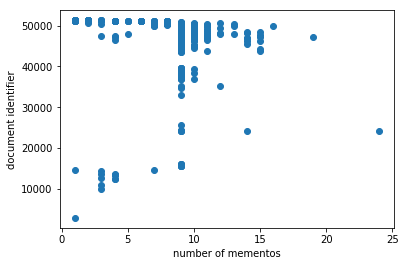

In [16]:
plt.scatter(mementocounts, identifiers)
plt.xlabel("number of mementos")
plt.ylabel("document identifier")

In [17]:
all_mdts = []

for timemap in timemaps:
    for memento in timemap:
        all_mdts.append(memento['datetime'])

In [18]:
len(all_mdts)

11745

In [19]:
min(all_mdts)

'2016-09-30T14:29:11Z'

In [20]:
max(all_mdts)

'2018-07-13T13:04:29Z'

In [21]:
from datetime import datetime

ids2mementos = []
mdt2ids = []
monthbuckets = {}

for identifier in alldata:
    timemap = alldata[identifier]
    
    for memento in timemap:
        
        ids2mementos.append(identifier)
        
        mdt = datetime.strptime(memento['datetime'], '%Y-%m-%dT%H:%M:%SZ')
        
        mdt2ids.append(mdt)
        monthbuckets.setdefault( datetime.strptime(mdt.strftime('%Y-%m'), '%Y-%m'), 0)
        monthbuckets[ datetime.strptime(mdt.strftime('%Y-%m'), '%Y-%m') ] += 1

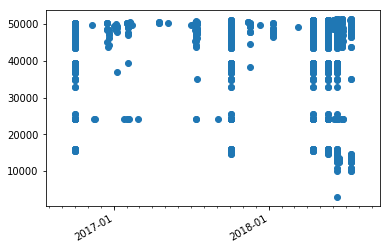

In [22]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()

ax.scatter(mdt2ids, ids2mementos)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

fig.autofmt_xdate()

In [23]:
print("hi")

hi


In [24]:
x = []
y = []

for key in monthbuckets:
    x.append(key)
    y.append(monthbuckets[key])

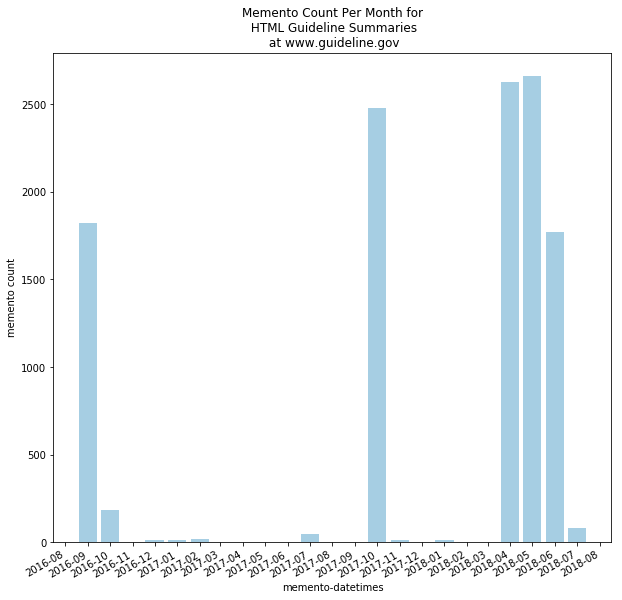

In [31]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.bar(x, y, width=25, color="#a6cee3")

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)

ax.set_xlabel("memento-datetimes")
ax.set_ylabel("memento count")
ax.set_title("Memento Count Per Month\nfor HTML Guideline Summaries\n at www.guideline.gov")

fig.autofmt_xdate()

In [26]:
list(monthbuckets.keys())[0]

datetime.datetime(2018, 6, 1, 0, 0)

In [27]:
monthbuckets[list(monthbuckets.keys())[0]]

1771

In [28]:
from urllib.parse import urlparse

archivedomains = {}

for timemap in timemaps:
    
    for memento in timemap:
        urim = memento['uri']
        archivedomain = urlparse(urim).netloc.split(':')[0]
        archivedomains.setdefault(archivedomain, 0)
        archivedomains[archivedomain] += 1

In [29]:
archivedomains

{'web.archive.org': 6848, 'archive.is': 10, 'wayback.archive-it.org': 4887}

In [30]:
total_mementos = 0

for ad in archivedomains:
    count = archivedomains[ad]
    total_mementos += count
    
total_mementos

11745

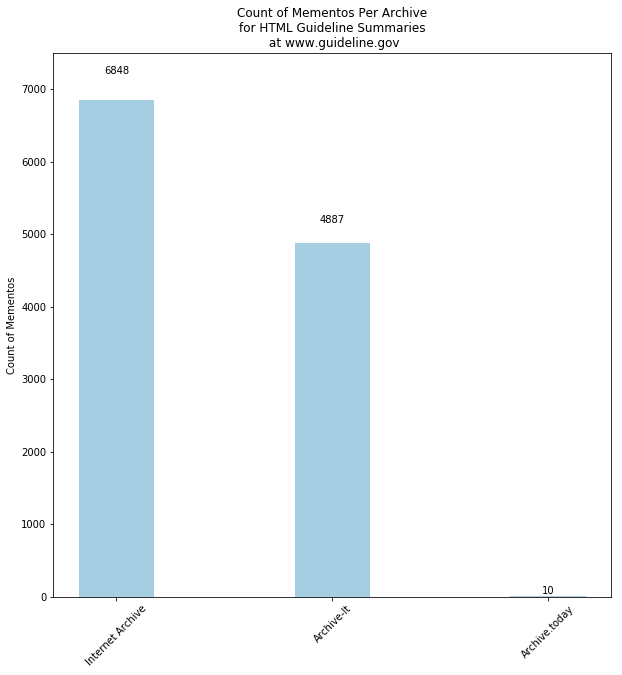

In [44]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 3
archivecounts = (6848, 4887, 10)
# men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
rects1 = ax.bar(ind, archivecounts, width, align='center', color='#a6cee3')

# women_means = (25, 32, 34, 20, 25)
# women_std = (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count of Mementos')
ax.set_title('Count of Mementos Per Archive\nfor HTML Guideline Summaries\n at www.guideline.gov')
ax.set_xticks(ind)
ax.set_xticklabels(('Internet Archive', 'Archive-It', 'Archive.today'))
ax.set_ylim(0, 7500)

# ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
# autolabel(rects2)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.show()